In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

# Загрузка данных

In [2]:
%%capture
!wget https://www.dropbox.com/s/64ol9q9ssggz6f1/data_ford_price.xlsx

In [2]:
data = pd.read_excel('data_ford_price.xlsx') 

# Трансформация признаков

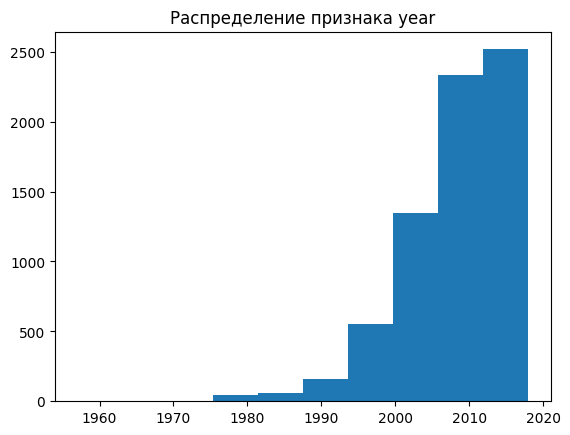

In [3]:
plt.hist(data.year)
plt.title('Распределение признака year');

## Квантильное преобразование

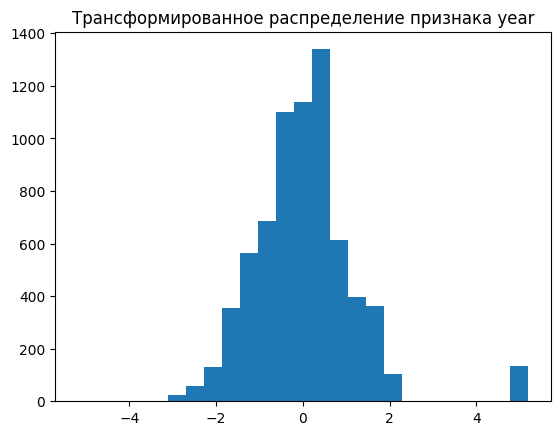

In [4]:
data_for_transform = data['year'].values.reshape((len(data),1))
 
quantile = QuantileTransformer(output_distribution='normal')
data_transformed = quantile.fit_transform(data_for_transform)
 
plt.hist(data_transformed, bins=25)
plt.title('Трансформированное распределение признака year')
plt.show()

### Задание 6.1

1 point possible (graded)

Преобразуйте распределение признаков condition и cylinders в равномерное. Какое значение признака condition получится у нулевого объекта? Ответ округлите до второго знака после точки-разделителя.

Transformed condition 0 element: 0.96

Transformed cylinders 0 element: 0.16

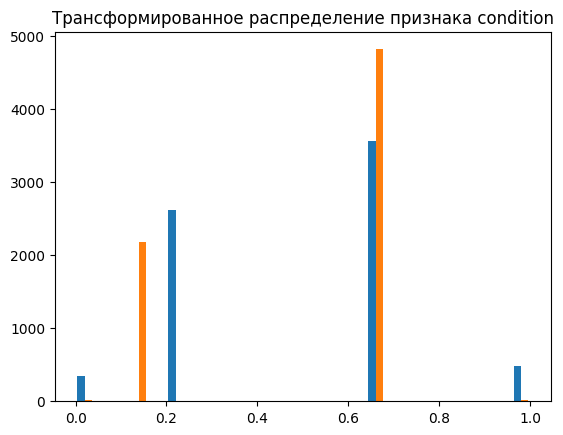

'Transformed condition 0 element: 0.96'

'Transformed cylinders 0 element: 0.16'

In [ ]:
data_for_transform = data[['condition', 'cylinders']].values.reshape(len(data), 2)

#data_for_transform = data['condition'].values.reshape((len(data),1))
 
quantile = QuantileTransformer(output_distribution='uniform')
data_transformed = quantile.fit_transform(data_for_transform)
 
plt.hist(data_transformed, bins=25)
plt.title('Трансформированное распределение признака condition')
plt.show()

display(f'Transformed condition 0 element: {data_transformed[0][0]:.2f}')
display(f'Transformed cylinders 0 element: {data_transformed[0][1]:.2f}')

## Логарифмическое преобразование

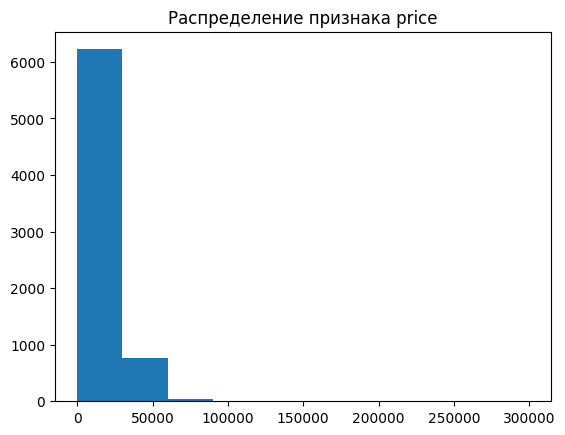

In [19]:
plt.hist(data.price)
plt.title('Распределение признака price');

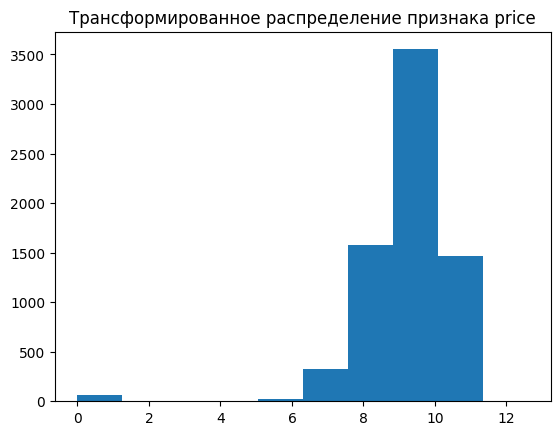

In [20]:
log_price = np.log(data['price'])
 
plt.hist(log_price)
plt.title('Трансформированное распределение признака price')
plt.show()

In [21]:
price_data = pd.concat([data['price'], log_price.rename('transformed_price')], axis = 1)
 
price_data.describe()

,price,transformed_price
count,7017.000000,7017.000000
mean,15121.549523,9.204510
std,11765.423119,1.275868
min,1.000000,0.000000
25%,5995.000000,8.698681
50%,12750.000000,9.453287
75%,21995.000000,9.998570
max,299500.000000,12.609870


### Задание 6.3

1 point possible (graded)

Какое значение признака transformed_price имеет последний объект? Ответ округлите до одного знака после точки-разделителя.

9.8

In [24]:
print(f'Значение признака transformed_price последнего объекта: {price_data['transformed_price'][len(price_data)-1]:.1f}')


Значение признака transformed_price последнего объекта: 9.8


## Преобразование Бокса-Кокса

In [38]:
from sklearn.preprocessing import PowerTransformer

# Предположим, что data — это DataFrame с колонками 'price' и 'year'
# Проверим наличие и корректность данных
if 'price' not in data.columns or 'year' not in data.columns:
    raise ValueError("В DataFrame отсутствуют колонки 'price' и 'year'")

# Проверим, есть ли отрицательные значения или нули
if (data[['price', 'year']] <= 0).any().any():
    raise ValueError("Для применения Box-Cox все значения должны быть положительными")

In [42]:
box_cox = PowerTransformer(method = 'box-cox')
 
data_box_cox = box_cox.fit_transform(data[['price', 'year']].values)
 
data_box_cox = pd.DataFrame(data_box_cox, columns = ['transformed_price', 'transformed_year'])

# 1. Сначала проверим данные
print("Проверка наличия NaN в столбцах data_box_cox:")
print(data_box_cox.isna().sum())

print("Проверка наличия NaN в столбцах data:")
print(data.isna().sum())

Проверка наличия NaN в столбцах data_box_cox:
transformed_price       0
transformed_year     7017
dtype: int64
Проверка наличия NaN в столбцах data:
price              0
year               0
condition          0
cylinders          0
odometer           0
title_status       0
transmission       0
drive            391
size            1564
lat                0
long               0
weather          180
dtype: int64


c:\Users\stepu\OneDrive\IDE\.venv313\Lib\site-packages\scipy\stats\_morestats.py:1153: UserWarning: The optimal lambda is 123.77781881071438, but the returned lambda is the constrained optimum to ensure that the maximum or the minimum of the transformed data does not overflow in float64.
  lmax = boxcox_normmax(x, method='mle', optimizer=optimizer)
c:\Users\stepu\OneDrive\IDE\.venv313\Lib\site-packages\sklearn\utils\extmath.py:1156: RuntimeWarning: overflow encountered in square
  temp **= 2
c:\Users\stepu\OneDrive\IDE\.venv313\Lib\site-packages\sklearn\utils\extmath.py:1162: RuntimeWarning: overflow encountered in square
  new_unnormalized_variance -= correction**2 / new_sample_count
c:\Users\stepu\OneDrive\IDE\.venv313\Lib\site-packages\sklearn\utils\extmath.py:1162: RuntimeWarning: invalid value encountered in subtract
  new_unnormalized_variance -= correction**2 / new_sample_count
c:\Users\stepu\OneDrive\IDE\.venv313\Lib\site-packages\sklearn\preprocessing\_data.py:84: RuntimeWarni

А, теперь понятно! Несмотря на то, что все значения в столбце 'year' положительные (от 1957 до 2018), проблема возникает из-за того, что PowerTransformer пытается применить трансформацию к обоим столбцам одновременно. Давайте трансформируем каждый столбец отдельно:



In [50]:
from scipy import stats

# Трансформируем каждый столбец отдельно
box_cox_price = PowerTransformer(method='box-cox')
box_cox_year = PowerTransformer(method='box-cox')

# Преобразуем данные
transformed_price = box_cox_price.fit_transform(data[['price']])
#transformed_year = box_cox_year.fit_transform(data[['year']])
# Пробуем применить box_cox напрямую к столбцу year
transformed_year, lambda_param = stats.boxcox(data['year'])


c:\Users\stepu\OneDrive\IDE\.venv313\Lib\site-packages\scipy\stats\_morestats.py:1153: UserWarning: The optimal lambda is 123.77781881071438, but the returned lambda is the constrained optimum to ensure that the maximum or the minimum of the transformed data does not overflow in <class 'numpy.float64'>.
  lmax = boxcox_normmax(x, method='mle', optimizer=optimizer)


In [51]:
# Объединяем результаты в один датафрейм
data_box_cox = pd.DataFrame({
    'transformed_price': transformed_price.ravel(),
    'transformed_year': transformed_year.ravel()
})

# Проверяем результат
print("Проверка наличия NaN после раздельной трансформации:")
print(data_box_cox.isna().sum())


Проверка наличия NaN после раздельной трансформации:
transformed_price    0
transformed_year     0
dtype: int64


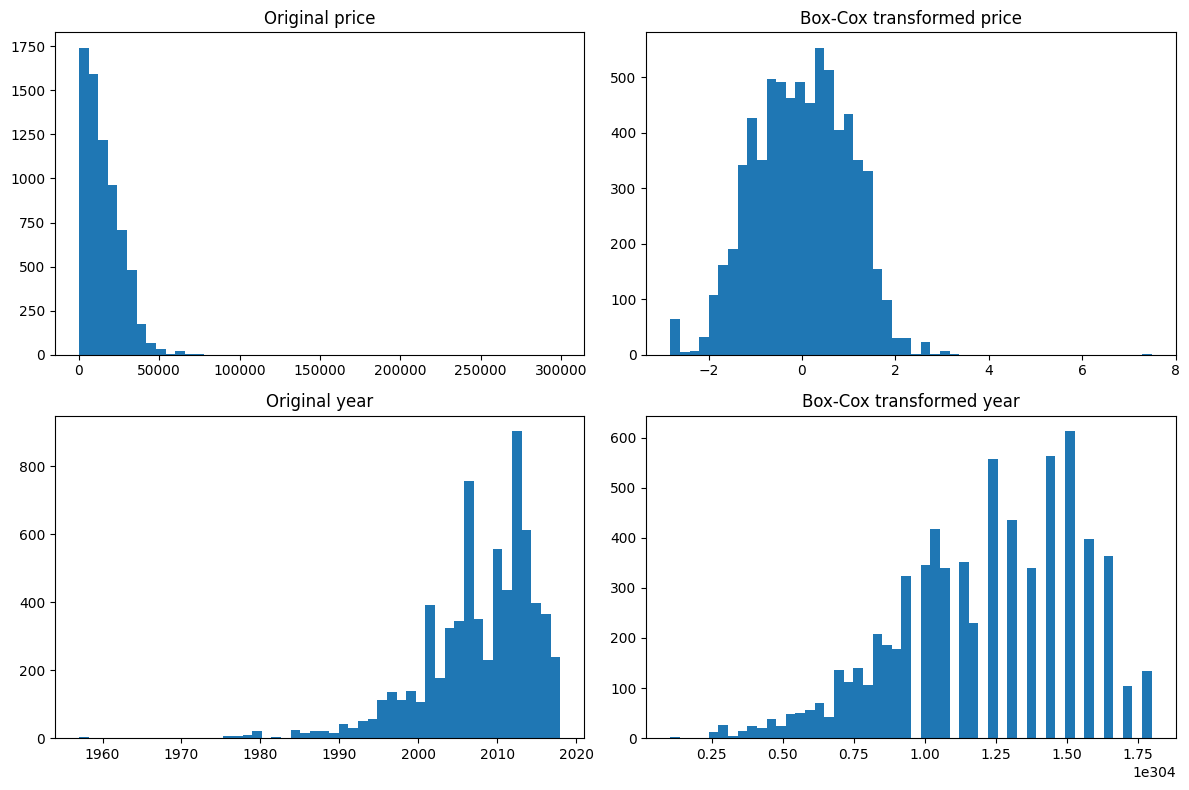

In [52]:

# Визуализация
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

axs[0][0].hist(data['price'], bins=50)
axs[1][0].hist(data['year'], bins=50)
axs[0][1].hist(data_box_cox['transformed_price'], bins=50)
axs[1][1].hist(data_box_cox['transformed_year'], bins=50)

axs[0][0].set(title='Original price')
axs[0][1].set(title='Box-Cox transformed price')
axs[1][0].set(title='Original year')
axs[1][1].set(title='Box-Cox transformed year')

plt.tight_layout()
plt.show()

In [53]:
# Проверим значения в столбце year
print("Минимум в year:", data['year'].min())
print("Максимум в year:", data['year'].max())
print("\nПервые несколько значений year:")
print(data['year'].head())

Минимум в year: 1957
Максимум в year: 2018

Первые несколько значений year:
0    2016
1    2009
2    2002
3    2000
4    2010
Name: year, dtype: int64


Проверка наличия NaN в столбцах data_box_cox:
transformed_price    0
transformed_year     0
dtype: int64
Проверка наличия NaN в столбцах data:
price              0
year               0
condition          0
cylinders          0
odometer           0
title_status       0
transmission       0
drive            391
size            1564
lat                0
long               0
weather          180
dtype: int64

Уникальные значения в transformed_year:
[1.63988962e+304 1.18808886e+304 8.59794557e+303 7.83744852e+303
 1.24415318e+304 9.00512242e+303 1.03446136e+304 9.87755375e+303
 1.30283322e+304 1.08335089e+304 1.13452488e+304 1.56620750e+304
 8.20898990e+303 1.36424963e+304 7.48254989e+303 1.42852855e+304
 2.81242604e+303 6.21510542e+303 1.79769313e+304 1.49580187e+304
 6.51049366e+303 7.14355629e+303 9.43136433e+303 2.94726917e+303
 6.81976235e+303 4.28312057e+303 5.93298114e+303 5.40619284e+303
 5.66353144e+303 4.08793063e+303 4.92571788e+303 3.72356840e+303
 1.71699897e+304 5.16042665e+30

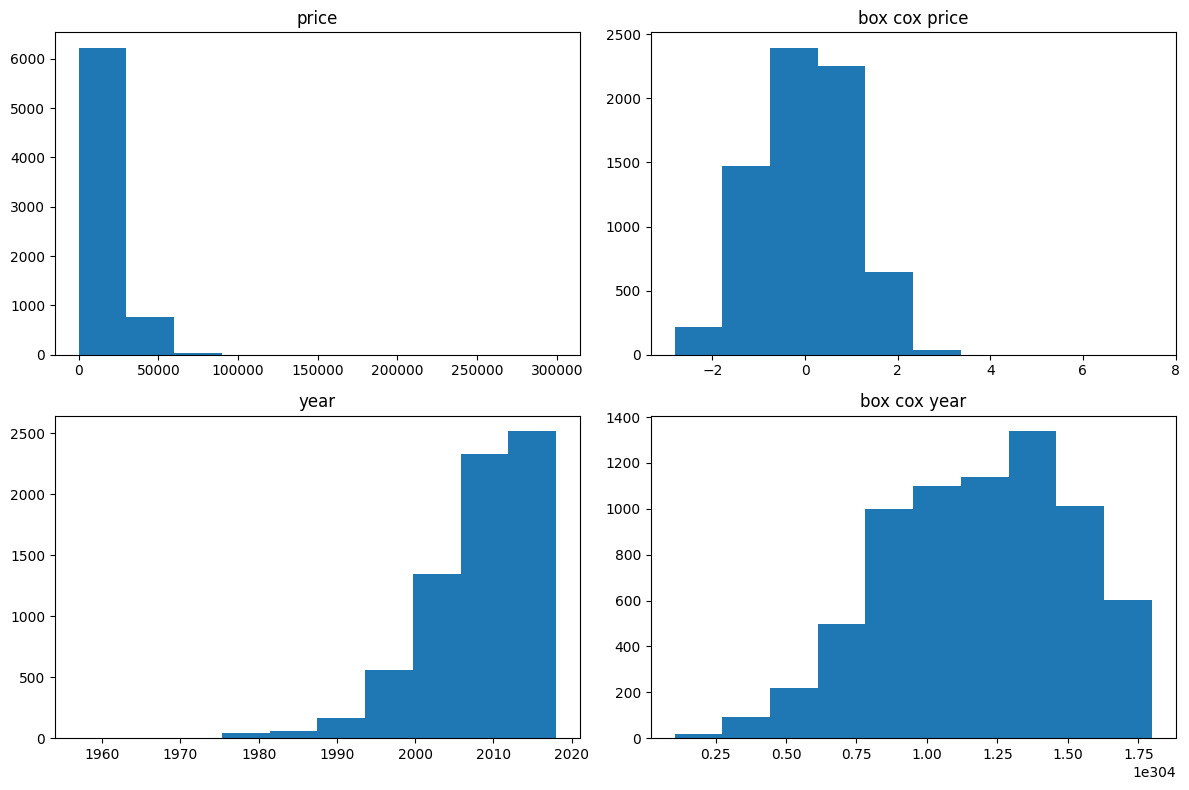

In [54]:
# 1. Сначала проверим данные
print("Проверка наличия NaN в столбцах data_box_cox:")
print(data_box_cox.isna().sum())

print("Проверка наличия NaN в столбцах data:")
print(data.isna().sum())

# 2. Проверим результат трансформации
print("\nУникальные значения в transformed_year:")
print(data_box_cox['transformed_year'].unique())

# 3. Исправленный код для построения графиков
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

axs[0][0].hist(data['price'].dropna())
axs[1][0].hist(data['year'].dropna())
axs[0][1].hist(data_box_cox['transformed_price'].dropna())
axs[1][1].hist(data_box_cox['transformed_year'].dropna())  # добавили dropna()

axs[0][0].set(title='price')
axs[0][1].set(title='box cox price')
axs[1][0].set(title='year')
axs[1][1].set(title='box cox year')

plt.tight_layout()
plt.show()

c:\Users\stepu\OneDrive\IDE\.venv313\Lib\site-packages\scipy\stats\_morestats.py:1153: UserWarning: The optimal lambda is 123.77781881071438, but the returned lambda is the constrained optimum to ensure that the maximum or the minimum of the transformed data does not overflow in float64.
  lmax = boxcox_normmax(x, method='mle', optimizer=optimizer)
c:\Users\stepu\OneDrive\IDE\.venv313\Lib\site-packages\sklearn\utils\extmath.py:1156: RuntimeWarning: overflow encountered in square
  temp **= 2
c:\Users\stepu\OneDrive\IDE\.venv313\Lib\site-packages\sklearn\utils\extmath.py:1162: RuntimeWarning: overflow encountered in square
  new_unnormalized_variance -= correction**2 / new_sample_count
c:\Users\stepu\OneDrive\IDE\.venv313\Lib\site-packages\sklearn\utils\extmath.py:1162: RuntimeWarning: invalid value encountered in subtract
  new_unnormalized_variance -= correction**2 / new_sample_count
c:\Users\stepu\OneDrive\IDE\.venv313\Lib\site-packages\sklearn\preprocessing\_data.py:84: RuntimeWarni

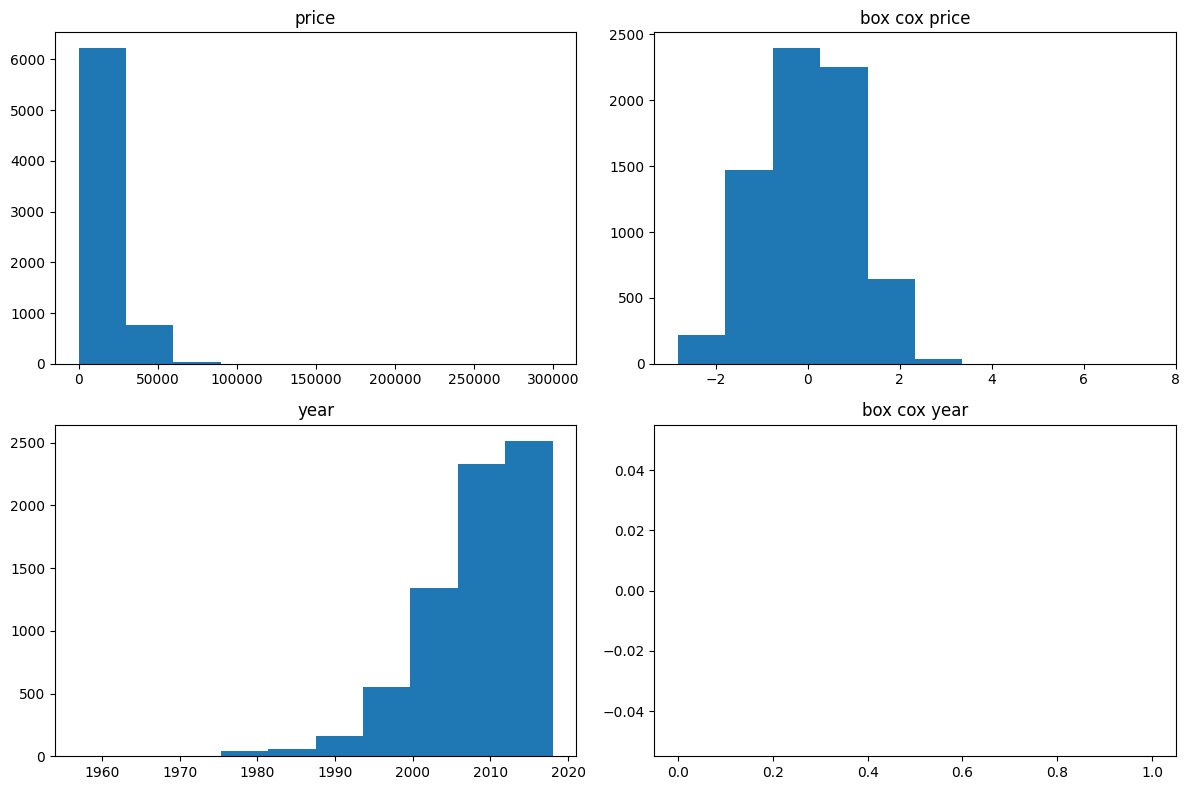

In [55]:
import pandas as pd
from sklearn.preprocessing import PowerTransformer

# Предположим, что data — это DataFrame с колонками 'price' и 'year'
# Проверим наличие и корректность данных
if 'price' not in data.columns or 'year' not in data.columns:
    raise ValueError("В DataFrame отсутствуют колонки 'price' и 'year'")

# Проверим, есть ли отрицательные значения или нули
if (data[['price', 'year']] <= 0).any().any():
    raise ValueError("Для применения Box-Cox все значения должны быть положительными")

# Преобразование с помощью PowerTransformer
box_cox = PowerTransformer(method='box-cox')
data_box_cox = box_cox.fit_transform(data[['price', 'year']].values)

# Создадим DataFrame с преобразованными данными
data_box_cox = pd.DataFrame(data_box_cox, columns=['transformed_price', 'transformed_year'])

# 3. Исправленный код для построения графиков
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

axs[0][0].hist(data['price'].dropna())
axs[1][0].hist(data['year'].dropna())
axs[0][1].hist(data_box_cox['transformed_price'].dropna())
axs[1][1].hist(data_box_cox['transformed_year'].dropna())  # добавили dropna()

axs[0][0].set(title='price')
axs[0][1].set(title='box cox price')
axs[1][0].set(title='year')
axs[1][1].set(title='box cox year')

plt.tight_layout()
plt.show()

Эти предупреждения указывают на проблемы с числовым переполнением при Box-Cox трансформации и стандартизации данных. Давайте исправим это, предварительно масштабировав данные:

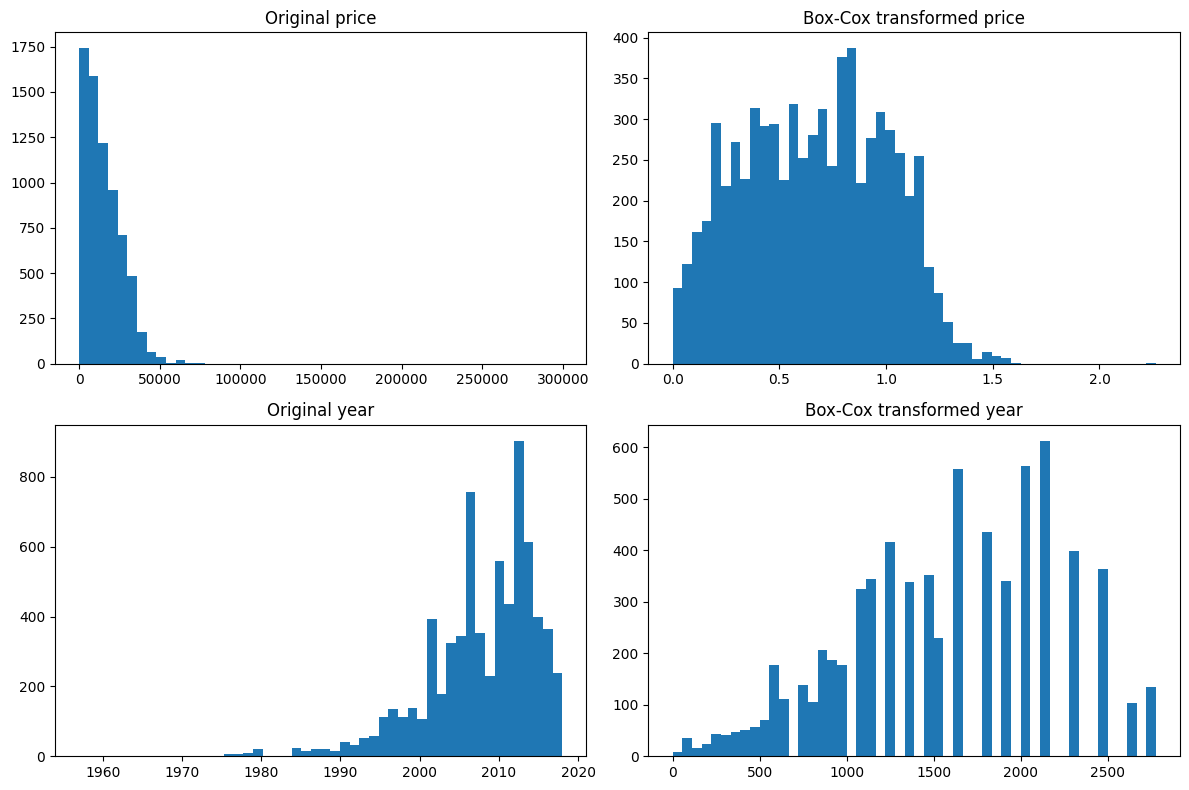

In [56]:
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 1. Сначала очистим данные от NaN
data_clean = data.copy()
data_clean['year'] = data_clean['year'].fillna(data_clean['year'].mean())
data_clean['price'] = data_clean['price'].fillna(data_clean['price'].mean())

# 2. Масштабируем данные перед Box-Cox трансформацией
scaler = StandardScaler()
data_scaled = pd.DataFrame(
    scaler.fit_transform(data_clean[['price', 'year']]),
    columns=['price', 'year']
)

# Делаем все значения положительными (требование для Box-Cox)
data_scaled = data_scaled - data_scaled.min() + 1

# 3. Применяем Box-Cox трансформацию
data_box_cox = pd.DataFrame()
data_box_cox['transformed_price'], _ = stats.boxcox(data_scaled['price'])
data_box_cox['transformed_year'], _ = stats.boxcox(data_scaled['year'])

# 4. Визуализация
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

axs[0][0].hist(data_clean['price'], bins=50)
axs[1][0].hist(data_clean['year'], bins=50)
axs[0][1].hist(data_box_cox['transformed_price'], bins=50)
axs[1][1].hist(data_box_cox['transformed_year'], bins=50)

axs[0][0].set(title='Original price')
axs[0][1].set(title='Box-Cox transformed price')
axs[1][0].set(title='Original year')
axs[1][1].set(title='Box-Cox transformed year')

plt.tight_layout()
plt.show()